In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
#dossier contenant les images 
dossier_breast = "/Users/zeinabtoure/Desktop/INF1853/Dataset_BUSI_with_GT"
#nom categories 
categories = ["benign", "malignant", "normal" ] 

--- BENIGN ---


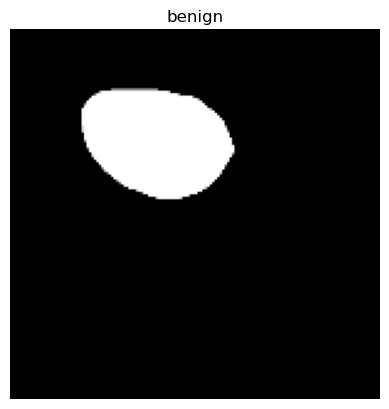

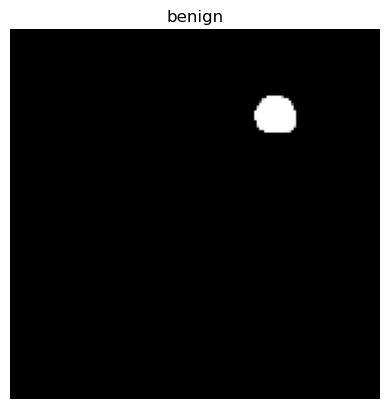

--- MALIGNANT ---


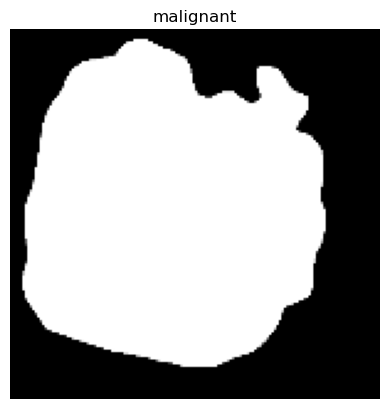

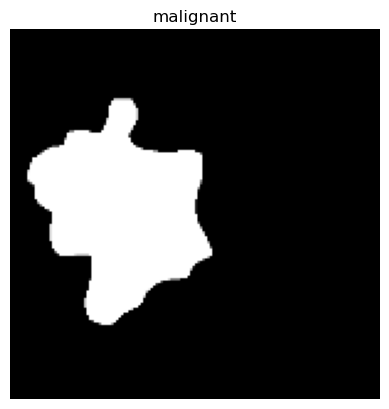

--- NORMAL ---


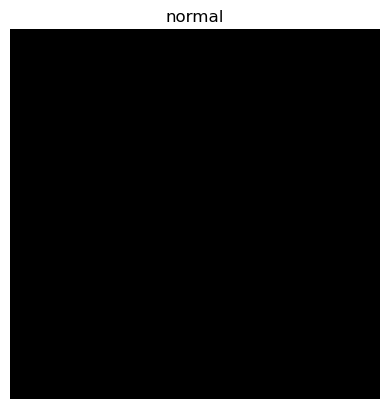

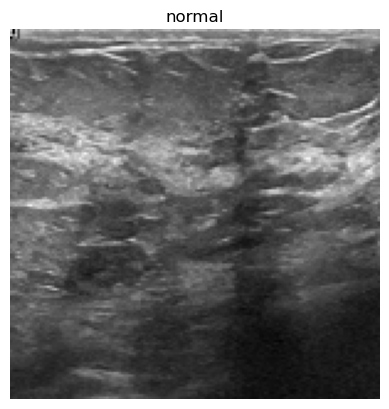

In [5]:
#test affichage
import random
taille_img = 150  # taille standard des images (150x150)

for category in categories:
    path = os.path.join(dossier_breast, category)
    images = os.listdir(path)
    print(f"--- {category.upper()} ---")
    
    for i in range(2):  # affichage des images par catégorie
        nom_img = random.choice(images)
        img_path = os.path.join(path, nom_img)
        #print("Image:", nom_img)
        
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array, (taille_img, taille_img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.title(f"{category}")
        plt.axis('off')
        plt.show()

In [13]:
#creation de tableaux 
#chargement des images et categories 
from tensorflow.keras.utils import to_categorical

Images = []
Categories = []
for i, category in enumerate(categories):
    path = os.path.join(dossier_breast, category)
    for nom_img in os.listdir(path):
        try:
            img_path = os.path.join(path, nom_img)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (125, 125))
            Images.append(img)
            Categories.append(i)
        except:
            continue
              
            
        

In [15]:
#preparation des donnees 
Images = np.array(Images) / 255.0
Categories = to_categorical(Categories, num_classes=3)



In [17]:
#fonction pour decouper les images en 2 classes de test 
from sklearn.model_selection import train_test_split
Images_train, Images_test, Categories_train, Categories_test = train_test_split(Images, Categories, test_size=0.2, random_state=30)

In [ ]:
#creation de CNN 